<h1>Fatih Yusuf Çıra - Turkish Car Market

<h3>İmporting Required Libraries and options settings

In [1]:
#Importing libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#It's my habit to do this. Normally you can not see all columns when checking a dataframe, this one fixes it so that you can see all columns when run "df"
pd.options.display.max_columns = None

In [5]:
#Reading the file
df=pd.read_csv(r"C:\Users\fatma\Desktop\mis49y\allcar.csv", encoding = "ISO-8859-1")

<h3>DATA ANALYSIS

In [6]:
#Checking the shape of dataset.
df.shape

(127440, 4)

We see that our dataset has 127440 records and 4 attributes.

In [7]:
#Checking the df
df.head()

,Model Year,Model,Price,Kilometers
0,1997,Hyundai Accent 1.5 GLS,48.750 TL,173.0
1,1998,Mercedes - Benz A 140 Elegance,66.500 TL,110.0
2,2005,Opel Vectra 1.6 Elegance,82.000 TL,216.0
3,2017,Volkswagen Jetta 1.4 TSi BlueMotion Comfortline,248.500 TL,62.0
4,2016,Audi A4 Sedan 1.4 TFSI,342.000 TL,89.0


In [8]:
#I didn't like that the price was before kilometers, so I change it.
df=df[["Model Year","Model","Kilometers","Price"]]

In [9]:
#Checking if it is fixed
df.head()

,Model Year,Model,Kilometers,Price
0,1997,Hyundai Accent 1.5 GLS,173.0,48.750 TL
1,1998,Mercedes - Benz A 140 Elegance,110.0,66.500 TL
2,2005,Opel Vectra 1.6 Elegance,216.0,82.000 TL
3,2017,Volkswagen Jetta 1.4 TSi BlueMotion Comfortline,62.0,248.500 TL
4,2016,Audi A4 Sedan 1.4 TFSI,89.0,342.000 TL


In [10]:
#Checking if we have any null value.
df.isnull().sum()

Model Year    0
Model         0
Kilometers    0
Price         0
dtype: int64

We see that this dataframe is cleaned before. So it is better for us.

In [11]:
df.dtypes

Model Year      int64
Model          object
Kilometers    float64
Price          object
dtype: object

In [12]:
df.head()

,Model Year,Model,Kilometers,Price
0,1997,Hyundai Accent 1.5 GLS,173.0,48.750 TL
1,1998,Mercedes - Benz A 140 Elegance,110.0,66.500 TL
2,2005,Opel Vectra 1.6 Elegance,216.0,82.000 TL
3,2017,Volkswagen Jetta 1.4 TSi BlueMotion Comfortline,62.0,248.500 TL
4,2016,Audi A4 Sedan 1.4 TFSI,89.0,342.000 TL


The column "Price"s type is object. I want it to be integer, so that I can make some data analysis and visualization.

In [13]:
# Define a function to remove "TL" from a string and convert it to an integer
def remove_tl_and_convert_to_int(price_str):
    return int(price_str.replace(' TL', '').replace('.', ''))

# Apply the function to the Price column
df['Price'] = df['Price'].apply(remove_tl_and_convert_to_int)

In [14]:
#Checking again to see if it is fixed.
df.dtypes

Model Year      int64
Model          object
Kilometers    float64
Price           int64
dtype: object

In [15]:
#Lets store kilometers as integer
df["Kilometers"]=df["Kilometers"].astype(int)

I believe that creating the Brand from the Model feature would be very valuable for us. I am doing it now.

In [16]:
# Define a function to extract the brand name from a string in the Model column
def extract_brand_name(model_str):
    split_str = model_str.split(' ')
    if len(split_str) > 1:
        return ' '.join(split_str[:1])
    else:
        return split_str[0]

# Apply the function to the Model column and store the result in a new column called "Brand"
df['Brand'] = df['Model'].apply(extract_brand_name)

In [17]:
#Lets see what we have as brands
print("Number of unique Brands:",len(df["Brand"].unique()))
print("Brands:",df["Brand"].unique())

Number of unique Brands: 32
Brands: ['Hyundai' 'Mercedes' 'Opel' 'Volkswagen' 'Audi' 'Renault' 'Ford' 'BMW'
 'Fiat' 'Toyota' 'Citroen' 'Peugeot' 'Skoda' 'Chevrolet' 'Mazda' 'Honda'
 'Kia' 'Volvo' 'Seat' 'Dacia' 'Tofaþ' 'Nissan' 'Porsche' 'Dodge' 'Suzuki'
 'Mitsubishi' 'Rover' 'Chrysler' 'Alfa' 'MINI' 'Jaguar' 'Aston']


In [18]:
#Brand is in the last column. Lets fix it again.
df=df[["Model Year","Brand","Model","Kilometers","Price"]]

In [19]:
#I see that Tofaş text is not right. Lets fix it.

df["Brand"] = df["Brand"].replace("Tofaþ", "Tofaş")


In [20]:
#Checking again if fixed.
df["Brand"].unique()

array(['Hyundai', 'Mercedes', 'Opel', 'Volkswagen', 'Audi', 'Renault',
       'Ford', 'BMW', 'Fiat', 'Toyota', 'Citroen', 'Peugeot', 'Skoda',
       'Chevrolet', 'Mazda', 'Honda', 'Kia', 'Volvo', 'Seat', 'Dacia',
       'Tofaş', 'Nissan', 'Porsche', 'Dodge', 'Suzuki', 'Mitsubishi',
       'Rover', 'Chrysler', 'Alfa', 'MINI', 'Jaguar', 'Aston'],
      dtype=object)

In [21]:
#Checking the dataset generally again.
df.describe()

,Model Year,Kilometers,Price
count,127440.000000,127440.000000,1.274400e+05
mean,2013.434353,144.714195,4.120934e+07
std,4.354785,96.375502,3.246609e+09
min,1983.000000,0.000000,1.195000e+04
25%,2012.000000,92.000000,1.060000e+05
50%,2016.000000,115.000000,1.575000e+05
75%,2017.000000,206.000000,2.250000e+05
max,2021.000000,999.000000,4.990005e+11


In [22]:
#I want to see the old models.
df.sort_values(by=["Model Year"]).head(50)

,Model Year,Brand,Model,Kilometers,Price
345,1983,Audi,Audi 100 Serisi 2.0 D,400,11950
121,1986,Mercedes,Mercedes - Benz 230 E,320,5500053500
923,1988,Renault,Renault R 11 GTS,300,19500
622,1988,Renault,Renault R 12 TSW,121,37500
420,1988,Renault,Renault R 12 TSW,999,22000
573,1989,Renault,Renault R 12 Toros,250,20500
798,1989,Tofaş,Tofaþ Þahin 1.6,130,2550024500
208,1990,BMW,BMW 3 Serisi 316i Standart,166,140000
827,1990,Honda,Honda Accord 2.0 EX,467,50000
221,1990,BMW,BMW 3 Serisi 316i Standart,325,44500


In [23]:
#I saw that there was some outliers, records that has a lot of price. More than 10.000.000 for a 
df[df["Price"]>100000000]

,Model Year,Brand,Model,Kilometers,Price
9,2013,Fiat,Fiat Punto 1.4 Pop S&S,83,109000108000
29,2013,Fiat,Fiat Punto 1.4 Pop S&S,83,109000108000
43,2020,Renault,Renault Megane 1.5 Blue DCI Touch,0,289000279000
71,2015,Volkswagen,Volkswagen Polo 1.4 TDi Trendline,142,110000107500
121,1986,Mercedes,Mercedes - Benz 230 E,320,5500053500
270,2010,Hyundai,Hyundai Accent Era 1.5 CRDi Select,230,8500084000
292,2017,Nissan,Nissan Micra 1.2 Match,29,144500142500
354,2017,Volkswagen,Volkswagen Golf 1.6 TDi BlueMotion Comfortline,99,195000187000
379,2009,Renault,Renault Megane 1.5 dCi Authentique,230,7450072500
394,2020,Fiat,Fiat Egea 1.4 Fire Easy,0,140000135000


In [24]:
#Lets drop the outliers. If we had the perfect Brand-Model Column series, we could just predict the value. We still can but it would take too much time,
#So I am just deleting them.

df = df[df['Price'] <= 100000000]

<h3>DATA VISUALIZATON

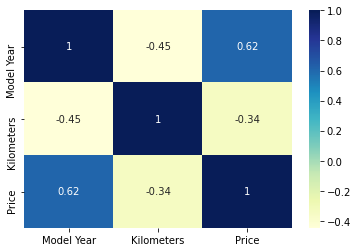

In [25]:
#We could check it before but it is never too late. Lets see the correlation heatmap.

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

From the correlation heatmap above, we can conclude in 3 things.
* As we can see, Price and Model year is highly correlated (0.62). Which means, if the model year increases, which also means that the car is new, the price will be more.
* Secondly, we can see that there is a negative relationship between kilometers and model year. Which also means that if your car is new, it will have less kilometers. Which also makes sense.(-0.45)
* Lastly, we can talk about Kilometers and price. They have a slightly negative correlational relationship. Which means that as the kilometers increase, the price decreases. But, the -0.34 is not that big enough to say it will happen in all cases. We should always consider that.

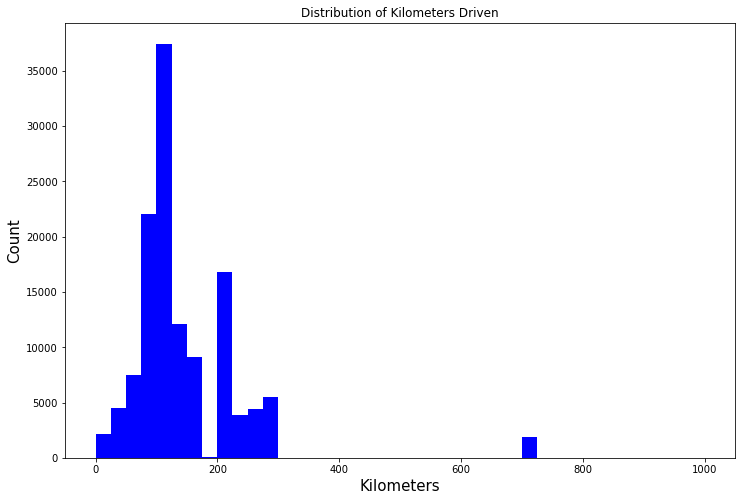

In [37]:
#Lets start data visualization

#First, I want to see the distribution of kilometers. We can use a histogram to see it.

plt.figure(figsize=(12,8))
plt.hist(df['Kilometers'], bins=40, color='blue')
plt.title('Distribution of Kilometers Driven', fontsize=12)
plt.xlabel('Kilometers', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

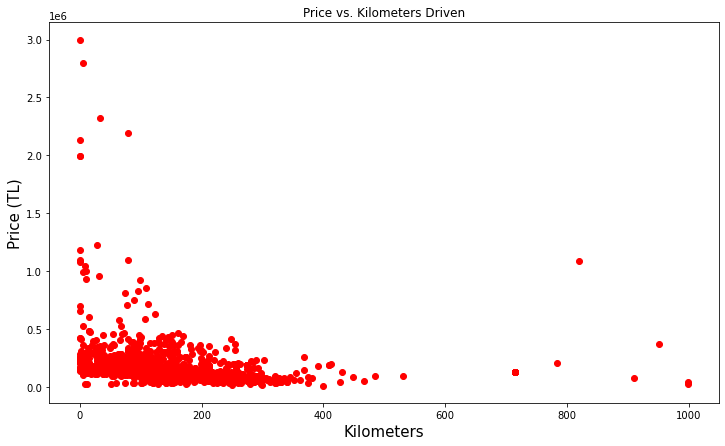

In [38]:
#Now, lets create a scatter plot to see the relationship between price and kilometers driven

plt.figure(figsize=(12,7))
plt.scatter(df['Kilometers'], df['Price'], color='red')
plt.title('Price vs. Kilometers Driven', fontsize=12)
plt.xlabel('Kilometers', fontsize=15)
plt.ylabel('Price (TL)', fontsize=15)
plt.show()

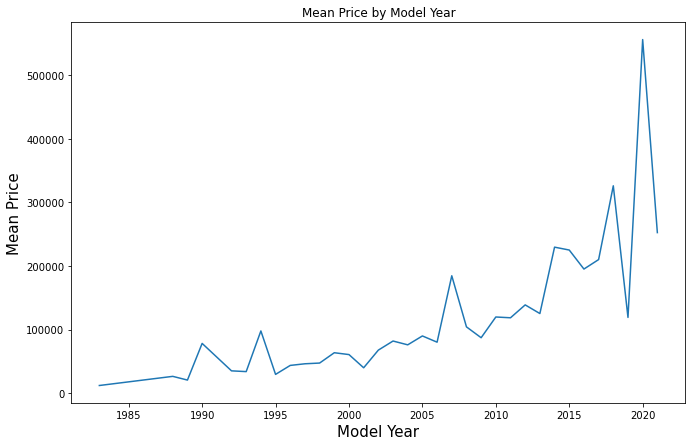

In [35]:
#Now, lets see the relationship between the model year and the price.

mean_price_by_year = df.groupby('Model Year')['Price'].mean()
plt.figure(figsize=(11,7))
plt.plot(mean_price_by_year.index, mean_price_by_year.values)
plt.title('Mean Price by Model Year', fontsize=12)
plt.xlabel('Model Year', fontsize=15)
plt.ylabel('Mean Price', fontsize=15)
plt.show()

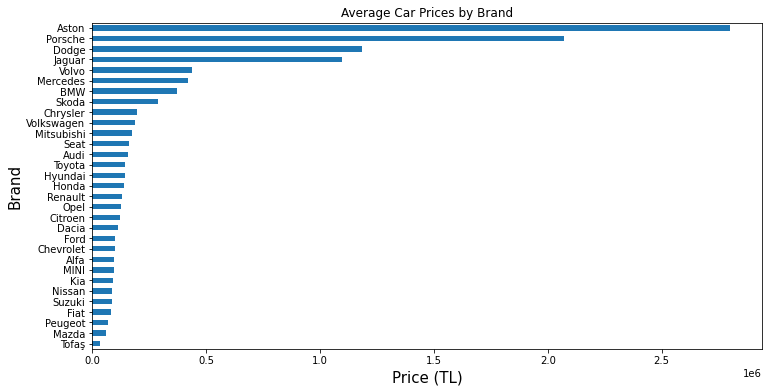

In [34]:
#Now, Lets see the average car prices by brand, using a barplot

plt.figure(figsize=(12,6))
df.groupby('Brand')['Price'].mean().sort_values().plot(kind='barh')
plt.title('Average Car Prices by Brand', fontsize=12)
plt.xlabel('Price (TL)', fontsize=15)
plt.ylabel('Brand', fontsize=15)
plt.show()

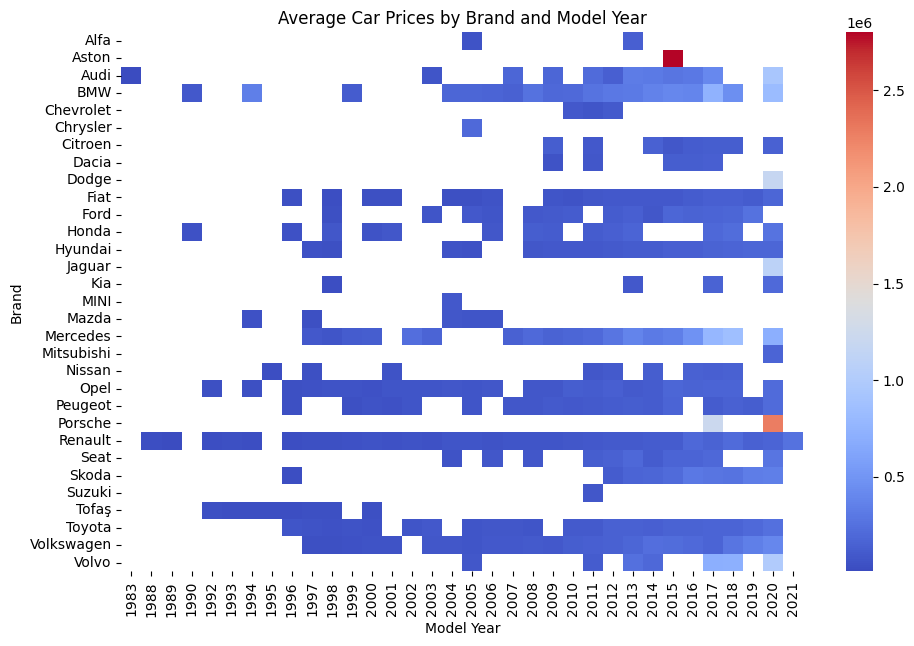

In [289]:
#Lets see the average price by brand and model year, in a heatmap.

#Creating a pivot table of average price by brand and Model Year
avg_price_by_brand_and_year = pd.pivot_table(df, values='Price', index='Brand', columns='Model Year', aggfunc='mean')

#Creating a heatmap of average price by brand and Model Year
plt.figure(figsize=(11,7))
sns.heatmap(avg_price_by_brand_and_year, cmap='coolwarm')
plt.title('Average Car Prices by Brand and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Brand')
plt.show()

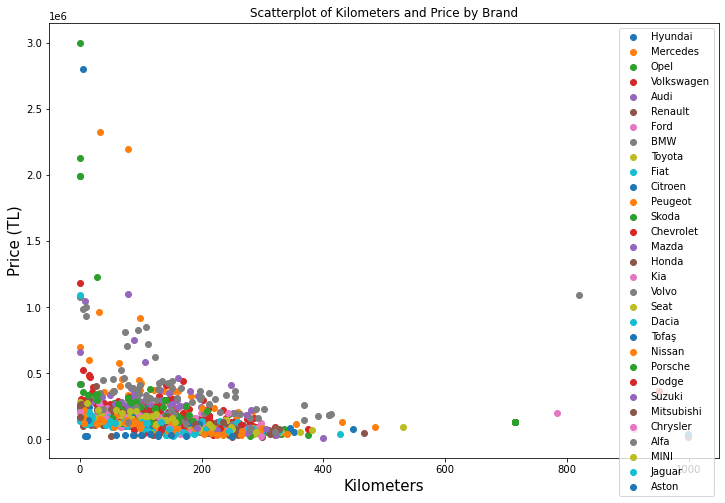

In [39]:
#Lets see the scatterplot of kilometers and price by brand

plt.figure(figsize=(12,8))
for brand in df['Brand'].unique():
    brand_df = df[df['Brand'] == brand]
    plt.scatter(brand_df['Kilometers'], brand_df['Price'], label=brand)
plt.title('Scatterplot of Kilometers and Price by Brand', fontsize=12)
plt.xlabel('Kilometers', fontsize=15)
plt.ylabel('Price (TL)', fontsize=15)
plt.legend()
plt.show()